# EFC1 GCC253 - Complexidade e Projeto de Algoritmos


> **Prof.: Douglas H. S. Abreu**


**Alunos**:
- Iago Manoel Brito de Sá Vaz da Silva - 202010135
- Vinícius Caputo de Castro - 202011042

**Turma**: 10A

Link do repositório GitHub: https://github.com/iagocq/gcc253-efc1

- O trabalho deve ser feito em grupos de no máximo 2 componentes (todos devem enviar a atividade no Campus Virtual)

- Trabalhos entregues após a data limite não serão aceitos

- Data limite de entrega: 26 de Julho de 2022 : 23h55m

- Enviar o trabalho para o campus virtual, do seguinte modo: link do repositório GitHub e do Colab para acesso ao Notebook. A Documentação deve estar no readme

- O trabalho deve ser desenvolvido no modelo Notebook utilizando a linguagem Python

# Importações e Variáveis globais

In [10]:
import matplotlib.pyplot as plt
import random
import time

def vetorAleatorio(n):
    random.seed(n)
    return [random.randint(0, n) for _ in range(n)]

def vetorCrescente(n):
    return list(range(n))

def vetorDecrescente(n):
    return list(reversed(vetorCrescente(n)))

N = 1000
SKIP = 5

def testar(metodo, vetores):
    return [[(i, metodo(vetor(i))[0]) for i in range(SKIP, N+1, SKIP)] for vetor in vetores]

def temporizar(m, *args):
    start = time.time()
    m(*args)
    return time.time() - start

def testarTempo(metodo, vetores):
    return [[(i, temporizar(metodo, vetor(i))) for i in range(SKIP, N+1, SKIP)] for vetor in vetores]

def plotar(resultados, legendas, titulo, ylabel):
    fig, ax = plt.subplots()
    for resultado, legenda in zip(resultados, legendas):
        ax.plot([v[0] for v in resultado], [v[1] for v in resultado], label=legenda)
    ax.set_xlabel('tamanho')
    ax.set_ylabel(ylabel)
    ax.legend()
    ax.set_title(titulo)

def testarEPlotar(metodo, casos, titulo):
    vetores, legendas = [cl[0] for cl in casos], [cl[1] for cl in casos]
    plotar(testar(metodo, vetores), legendas, titulo, 'comparações')

def testarEPlotarTempo(metodo, casos, titulo):
    vetores, legendas = [cl[0] for cl in casos], [cl[1] for cl in casos]
    plotar(testarTempo(metodo, vetores), legendas, titulo, 'tempo')

casoDecrescente = vetorDecrescente, 'decrescente'
casoCrescente = vetorCrescente, 'crescente'
casoAleatorio = vetorAleatorio, 'aleatório'


# Funções de Ordenação

> Utilize este espaço para definir as funções de ordenação vista em sala de aula



##  Insertion Sort


In [11]:
def insertionSort(vetor):
  c = 0
  for j in range(1,len(vetor)):
    chave = vetor[j]
    i = j - 1
    while i >= 0 and vetor[i] > chave:
      c += 1
      vetor[i+1] = vetor[i]
      i = i-1
    vetor[i+1] = chave
  return c, vetor

##  Merge Sort


In [12]:
def merge(a, p, q, r):
  c = 0
  inf = float('inf')
  L = a[p:q+1] + [inf]
  R = a[q+1:r+1] + [inf]
  i, j = 0, 0
  for k in range(p, r + 1):
    c += 1
    if L[i] <= R[j]:
      a[k] = L[i]
      i += 1
    else:
      a[k] = R[j]
      j += 1
  return c

def mergeSortD(a, p, r):
  c = 0
  if p < r:
    q = (p + r) // 2
    c += mergeSortD(a, p, q)[0]
    c += mergeSortD(a, q + 1, r)[0]
    c += merge(a, p, q, r)
  return c, a

def mergeSort(a):
  return mergeSortD(a, 0, len(a)-1)

##  Selection Sort


In [13]:
def selectionSort(vetor):
  c = 0
  for j in range(len(vetor)):
    posValorMin = j
    for i in range(j + 1, len(vetor)):
      c += 1
      if vetor[i] < vetor[posValorMin]:
        posValorMin = i

    vetor[j], vetor[posValorMin] = vetor[posValorMin], vetor[j]
  return c, vetor

##  Bubble Sort


In [14]:
def bubbleSort(a):
  c = 0
  alterado = True
  for i in range(len(a)-1):
    if not alterado: break
    alterado = False
    for j in range(len(a)-i-1):
      c += 1
      if a[j] > a[j+1]:
        a[j+1], a[j] = a[j], a[j+1]
        alterado = True
  return c, a

## Heap Sort

In [15]:
def heapify(vetor, n, i): 
  c = 0
  maior = i
  l = 2 * i + 1
  r = 2 * i + 2

  if l < n:
    c += 1
    if vetor[maior] < vetor[l]:
      maior = l

  if r < n:
    c += 1
    if vetor[maior] < vetor[r]:
      maior = r

  if maior != i:
    vetor[i], vetor[maior] = vetor[maior], vetor[i]
    return c + heapify(vetor, n, maior)
  return c

def heapSort(vetor):
  c = 0
  n = len(vetor)

  for i in range(n // 2 - 1, -1, -1):
    c += heapify(vetor, n, i)

  for i in range(n-1, 0, -1):
    vetor[i], vetor[0] = vetor[0], vetor[i]
    c += heapify(vetor, i, 0)
  return c, vetor

## Quick Sort

> pivo = *A[A-comprimento]*

In [16]:
def particao(A, esquerda, direita, aleatorio):
  c = 0
  pivoI = random.randint(esquerda, direita) if aleatorio else direita
  pivo = A[pivoI]
  j = esquerda

  for i in range(esquerda, len(A)):
    c += 1
    if A[i] < pivo:
      A[i], A[j] = A[j], A[i]
      j += 1

  A[j], A[direita] = A[direita], A[j]
  return c, j

def quickSortD(A, esquerda, direita, aleatorio): 
  c = 0
  if direita > esquerda:
    n, j = particao(A, esquerda, direita, aleatorio)
    c += n
    n, A = quickSortD(A, esquerda, j - 1, aleatorio)
    c += n
    n, A = quickSortD(A, j + 1, direita, aleatorio)
    c += n
  return c, A

def quickSort(A):
  return quickSortD(A, 0, len(A)-1, False)

def quickSortAleatorio(A):
  return quickSortD(A, 0, len(A)-1, True)

# Questões



1.   Dado um conjunto de arranjos ***A[5,...,1000, passo=5]***

> a) Defina o melhor e pior caso para cada um dos algoritmos definidos acima, crie vetores ***A*** para estes casos e faça a comparação gráficamente também com casos aleatórios (plote um gráfico para cada algoritmo). Conte o numero de comparações realzizadas para cada uma das execuções.

> b) Repita o procedimento acima. Porém compare os algoritmos para pior e melhor caso e também casos aleatórios.

> c) Qual é o comportamento assintótico para cada um dos algorítmos acima (melhor caso e pior caso, se puder, analise também em casos aleatórios)



**Obs.:** para os algoritmos QuickSort e Merge Sort mostre apenas um melhor e um pior caso. faça a comparação com os demais métodos com o conjunto ***A*** apenas em casos aleatórios.





Insertion Sort
- Melhor caso: $\Theta(n)$ quando A está em ordem crescente
- Pior caso: $\Theta(n^2)$ quando A está em ordem decrescente

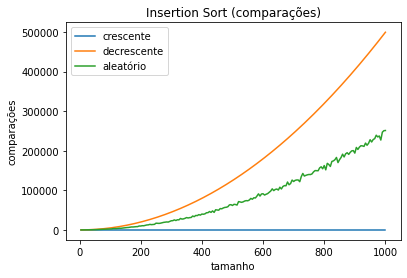

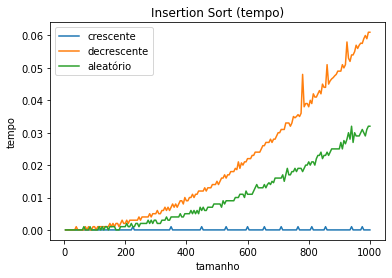

In [17]:
testarEPlotar(insertionSort, (casoCrescente, casoDecrescente, casoAleatorio), 'Insertion Sort (comparações)')
testarEPlotarTempo(insertionSort, (casoCrescente, casoDecrescente, casoAleatorio), 'Insertion Sort (tempo)')

Merge Sort
- Melhor caso: $\Theta(n\log{n})$
- Pior caso: $\Theta(n\log{n})$
- Merge sort sempre realiza a mesma quantidade de comparações para vetores de mesmo tamanho

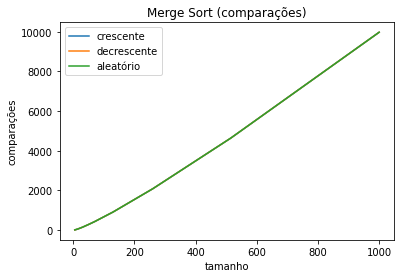

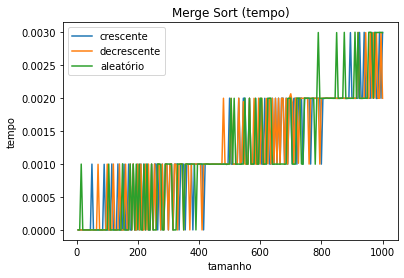

In [18]:
testarEPlotar(mergeSort, (casoCrescente, casoDecrescente, casoAleatorio), 'Merge Sort (comparações)')
testarEPlotarTempo(mergeSort, (casoCrescente, casoDecrescente, casoAleatorio), 'Merge Sort (tempo)')

Selection Sort
- Melhor caso: $\Theta(n^2)$
- Pior caso: $\Theta(n^2)$
- Sempre realiza a mesma quantidade de comparações para vetores de mesmo tamanho

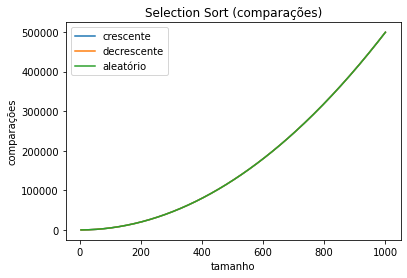

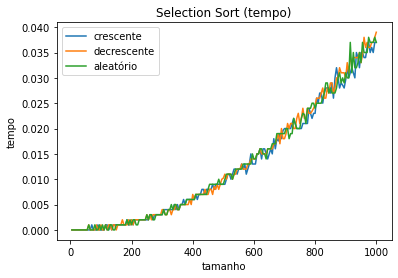

In [19]:
testarEPlotar(selectionSort, (casoCrescente, casoDecrescente, casoAleatorio), 'Selection Sort (comparações)')
testarEPlotarTempo(selectionSort, (casoCrescente, casoDecrescente, casoAleatorio), 'Selection Sort (tempo)')

Bubble Sort
- Melhor caso: $\Theta(n)$ quando A está em ordem crescente
- Pior caso: $\Theta(n^2)$ quando A está em ordem decrescente

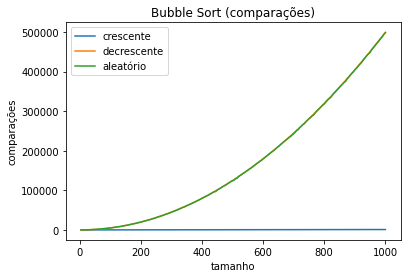

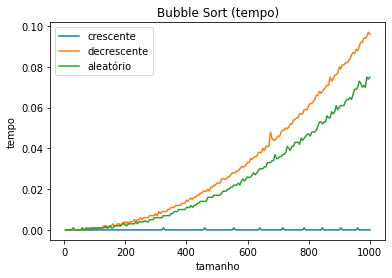

In [20]:
testarEPlotar(bubbleSort, (casoCrescente, casoDecrescente, casoAleatorio), 'Bubble Sort (comparações)')
testarEPlotarTempo(bubbleSort, (casoCrescente, casoDecrescente, casoAleatorio), 'Bubble Sort (tempo)')

Heap Sort
- Melhor caso: $\Theta(n)$ quando todos os elementos de A são iguais
- Pior caso: $\Theta(n\log{n})$ quando A é aleatório

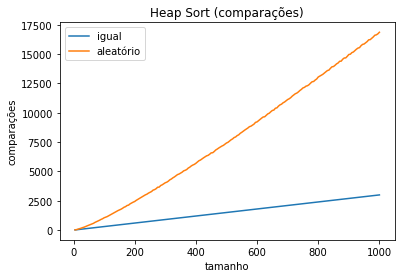

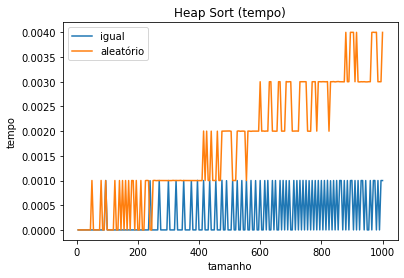

In [21]:
def vetorIgual(n):
    v = random.randint(0, n)
    return [v for _ in range(n)]

testarEPlotar(heapSort, ((vetorIgual, 'igual'), casoAleatorio), 'Heap Sort (comparações)')
testarEPlotarTempo(heapSort, ((vetorIgual, 'igual'), casoAleatorio), 'Heap Sort (tempo)')

Quick Sort
- Melhor caso: $\Theta(n\log{n})$ quando todos os pivôs selecionados geram partições de tamanho próximo de $n\over{2}$
- Pior caso: $\Theta(n^2)$ quando todos os pivôs selecionados geram partições de tamanho $1$ e $n-1$

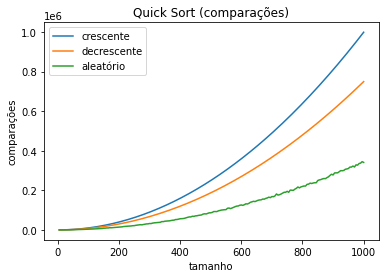

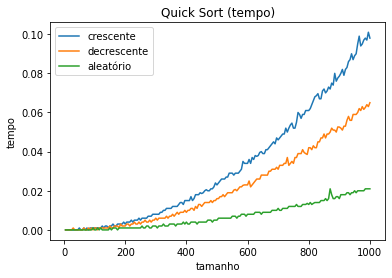

In [22]:
testarEPlotar(quickSort, (casoCrescente, casoDecrescente, casoAleatorio), 'Quick Sort (comparações)')
testarEPlotarTempo(quickSort, (casoCrescente, casoDecrescente, casoAleatorio), 'Quick Sort (tempo)')

b) Comparação entre os metodos de ordenação

In [30]:
def testarCasos(casos, fTeste):
  return [v[0] for v in map(lambda p: fTeste(p[0], (p[1],)), casos)]

def testarCompETempo(casos):
  return testarCasos(casos, testar), testarCasos(casos, testarTempo)

def plotarCompETempo(casos, legendas, titulos):
  for n, ylabel in enumerate(['comparações', 'tempo']):
    for i, caso in enumerate(casos):
      plotar(caso[n], legendas, f"{titulos[i]} ({ylabel})", ylabel)

pioresCasos = testarCompETempo([
  (insertionSort, vetorDecrescente),
  (mergeSort, vetorDecrescente),
  (selectionSort, vetorDecrescente),
  (bubbleSort, vetorDecrescente),
  (heapSort, vetorAleatorio),
  (quickSort, vetorDecrescente)
])

melhoresCasos = testarCompETempo([
  (insertionSort, vetorCrescente),
  (mergeSort, vetorCrescente),
  (selectionSort, vetorCrescente),
  (bubbleSort, vetorCrescente),
  (heapSort, vetorIgual),
  (quickSort, vetorAleatorio)
])

casosAleatorios = testarCompETempo([
  (insertionSort, vetorAleatorio),
  (mergeSort, vetorAleatorio),
  (selectionSort, vetorAleatorio),
  (bubbleSort, vetorAleatorio),
  (heapSort, vetorAleatorio),
  (quickSort, vetorAleatorio)
])

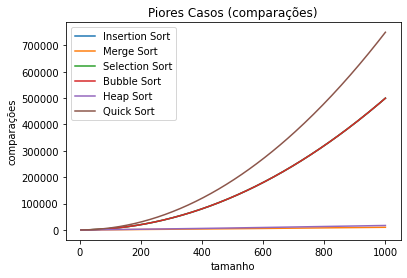

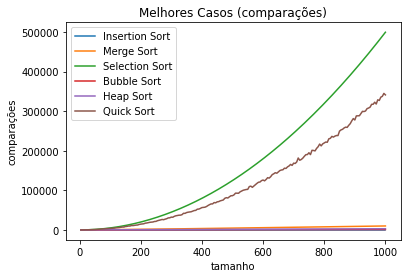

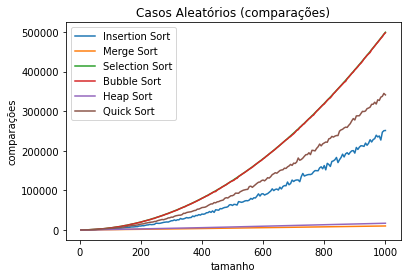

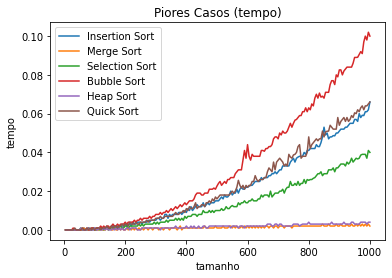

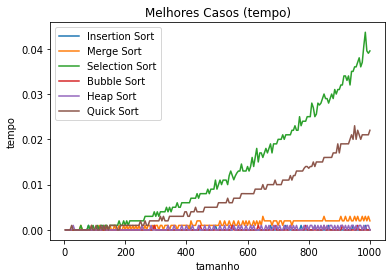

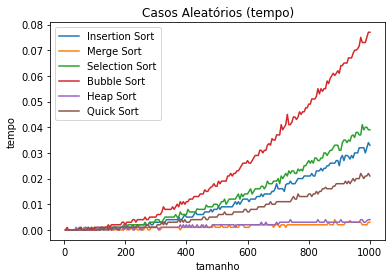

In [31]:
legendas = 'Insertion Sort', 'Merge Sort', 'Selection Sort', 'Bubble Sort', 'Heap Sort', 'Quick Sort'
plotarCompETempo((pioresCasos, melhoresCasos, casosAleatorios), legendas, ('Piores Casos', 'Melhores Casos', 'Casos Aleatórios'))

#### 2.   Desenvolva uma versão aleatorizada do QUICKSORT (pivo aleatório) e compare com a versão apresentada em sala de aula e definida acima.



Comparação piores casos QuickSort (Último Elemento como Pivô) e QuickSort (Pivô Aleatório)

In [32]:
comparacaoQuickCasosPiores = testarCompETempo([
  (quickSort, vetorDecrescente),
  (quickSortAleatorio, vetorDecrescente)
])

legendas = ('Último Elemento como Pivô', 'Pivô Aleatório')

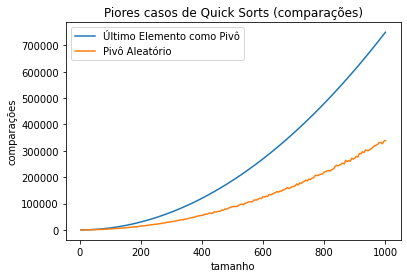

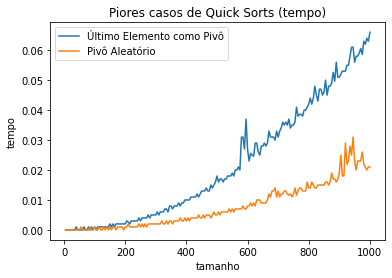

In [33]:
plotarCompETempo((comparacaoQuickCasosPiores,), legendas, ('Piores casos de Quick Sorts',))

Comparação casos aleatorios QuickSort (Último Elemento como Pivô) e QuickSort (Pivô Aleatório)

In [34]:
comparacaoQuickCasosAleatorios = testarCompETempo([
  (quickSort, vetorAleatorio),
  (quickSortAleatorio, vetorAleatorio)
])


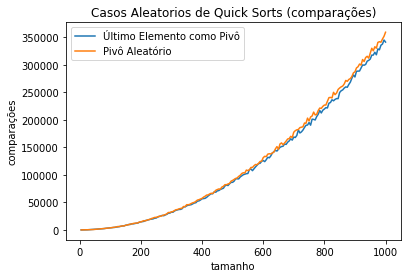

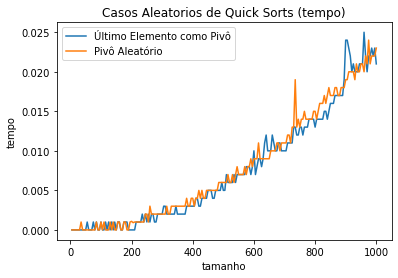

In [35]:
plotarCompETempo((comparacaoQuickCasosAleatorios,), legendas, ('Casos Aleatorios de Quick Sorts',))

Comparação melhores casos QuickSort (Último Elemento como Pivô) e QuickSort (Pivô Aleatório)

In [36]:
comparacaoQuickCasosCrescente = testarCompETempo([
  (quickSort, vetorCrescente),
  (quickSortAleatorio, vetorCrescente)
])

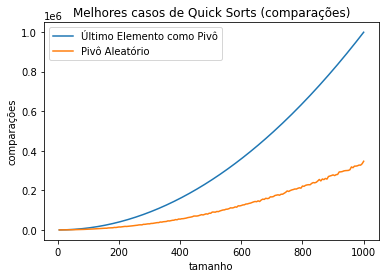

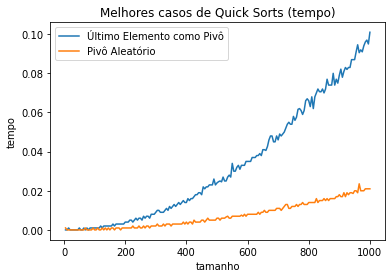

In [37]:
plotarCompETempo((comparacaoQuickCasosCrescente,), legendas, ('Melhores casos de Quick Sorts',))

Comparação total entre todos os casos QuickSort (Último Elemento como Pivô) e QuickSort (Pivô Aleatório)

In [38]:
comparacaoQuickTotal = testarCompETempo([
  (quickSort, vetorDecrescente),
  (quickSort, vetorAleatorio),
  (quickSort, vetorCrescente),
  (quickSortAleatorio, vetorDecrescente),
  (quickSortAleatorio, vetorAleatorio),
  (quickSortAleatorio, vetorCrescente)
])

legendas = ('Pior caso', 'Pior caso pivo aleatorio', 'Caso aleatorio', 'Caso aleatorio pivo aleatorio', 'Melhor caso', 'Melhor caso pivo aleatorio')

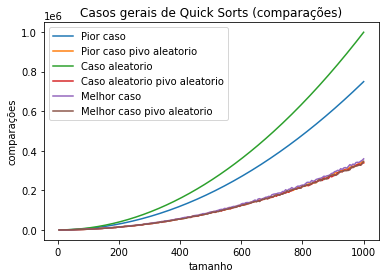

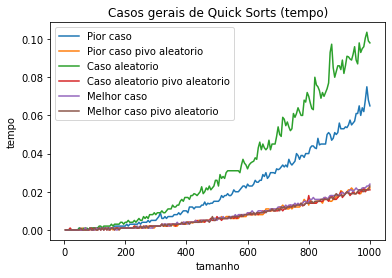

In [39]:
plotarCompETempo((comparacaoQuickTotal,), legendas, ('Casos gerais de Quick Sorts',))